In [1]:
import pandas as pd
dataset=pd.read_csv("Mall_Customers.csv")
x=dataset.iloc[:,[3,4]].values


In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
from sklearn.cluster import OPTICS
cluster = OPTICS(min_samples=10, xi=.05, min_cluster_size=.05)
y=cluster.fit_predict(x_scaled)

In [13]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=y
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


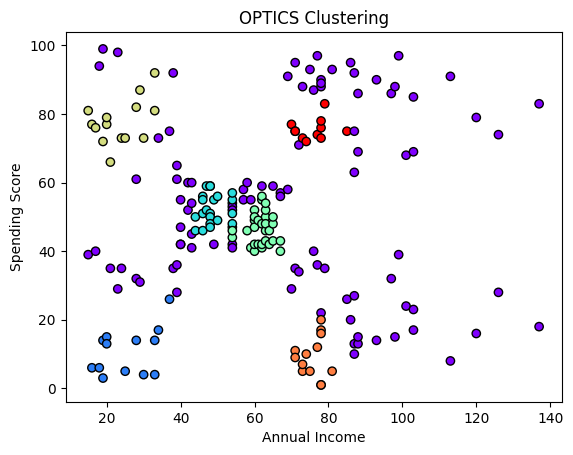

In [17]:
import matplotlib.pyplot as plt
labels = cluster.labels_

plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title("OPTICS Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

C:\Users\DELL\anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


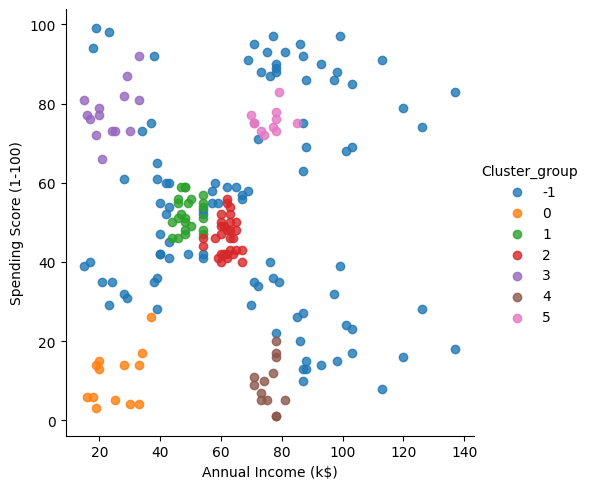

In [14]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False,legend_out=True,legend=True)